## Logistic Regression Agenda

  * Attempt to use linear regression for classification
  * Logistic regression is a better alternative for classification
  * Brief overview of probability, odds, e, log, and log-odds
  * What is the logistic regression model?
  * Interpreting logistic regression coefficients
  * Compare logistic regression with other models
  
By the end of this portion of the class you will be able to:
  * Use logistic regression for a classification problem in the future
  * interpret the coefficients of a trained logistic regression model

### Predicting a categorical response

In the first part of today's lesson, we were attempting to predict a **continuous response**. However, what we want to do now is see if we can apply the same sort of logic to predict an outcome that has only 2 distinct possibilities, or what is known as a **categorical response.**

In machine learning parlance, we looked at **regression** when we were using linear regression, but we are now going to try to use the same approach for what is known as a **classification** problem (problems with only a discrete, finite number of outcomes; in our case, just 2).

As always, we are going to import all of the functionality we need before we get started:

In [1]:
# Python 2 and 3 compatibility
from __future__ import print_function

#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import scipy.stats as stats

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Now we are going to import a slightly different dataset. This dataset is also from the famed [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html) and can be found [here](https://archive.ics.uci.edu/ml/datasets/Vertebral+Column).

This dataset contains 6 biomechanical features used to classify orthopaedic patients into 2 classes - normal and abnormal:
  * pelvic incidence
  * pelvic tilt
  * lumbar lordosis angle
  * sacral slope
  * pelvic radius
  * grade of spondylolisthesis
  
Lets load the data in:

In [2]:
# We're using the dataset here: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column
'''
Data set containing values for six biomechanical features used to classify orthopaedic patients into 3 classes
(normal, disk hernia or spondilolysthesis) or 2 classes (normal or abnormal).

Each patient is represented in the data set by six biomechanical attributes derived from the shape and orientation
of the pelvis and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle, sacral slope,
pelvic radius and grade of spondylolisthesis. The following convention is used for the class labels: DH (Disk Hernia),
Spondylolisthesis (SL), Normal (NO) and Abnormal (AB).
'''
vertebral_data = pd.read_csv("../data/vertebral_column_2_categories.dat", sep=" ",
                             names=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","spondy_grade","outcome"])
vertebral_data.outcome.value_counts()   # builds up a table of counts
# print(vertebral_data.shape)  # -- this gives output of (310,7), as expected
# There are 310 total observations here.
# AB and NO need to be turned into numbers

AB    210
NO    100
Name: outcome, dtype: int64

In order to use linear regression for this task, we have to convert our **categorical** target into a number:

In [3]:
# Review the pandas notebooks to make sure you understand the following.
# We're converting our categorical target into a number here
vertebral_data["outcome_number"] = (vertebral_data.outcome=='AB').astype(int)   
vertebral_data.outcome_number.value_counts() 
# AB corresponds to outcome number 1 and NO corresponds to outcome number 0
vertebral_data.head(17)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondy_grade,outcome,outcome_number
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,1
5,40.25,13.92,25.12,26.33,130.33,2.23,AB,1
6,53.43,15.86,37.17,37.57,120.57,5.99,AB,1
7,45.37,10.76,29.04,34.61,117.27,-10.68,AB,1
8,43.79,13.53,42.69,30.26,125.00,13.29,AB,1
9,36.69,5.01,41.95,31.68,84.24,0.66,AB,1


Cool, so now our outcome is no longer a value, but a number. Let's plot `pelvic_incidence` relative to this new numeric `outcome_number`:

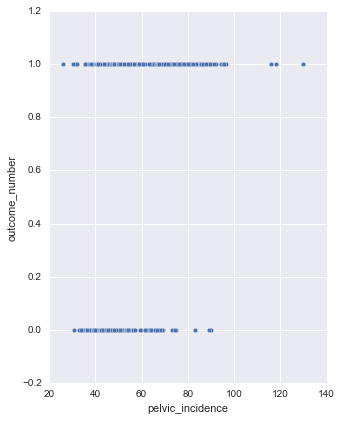

In [4]:
sns.pairplot(vertebral_data,x_vars=["pelvic_incidence"],y_vars="outcome_number", size=6, aspect=0.8);
# Remember, pelvic_incidence is a feature

And now lets do a simple linear regression on that feature like we did before:

In [5]:
# fit a linear regression model and store the predictions
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
linreg = LinearRegression()
linreg.fit(X, y)
outcome_pred = linreg.predict(X)  # the predictions are stored here

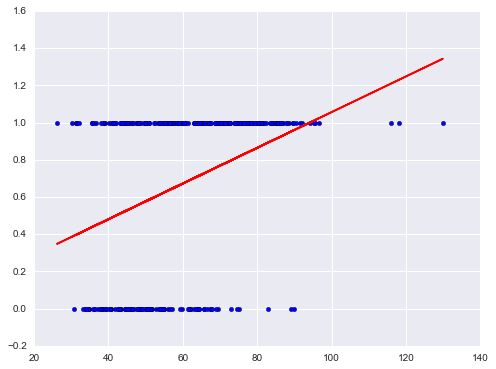

In [6]:
# scatter plot that includes the regression line
plt.figure(figsize=(8, 6))
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred, color='red');
# pelvic_incidence vs. outcom_pred is being plotted here

Lets examine the predictions:

In [7]:
# Want to transform the linear regression into some kind of prediction
outcome_pred[:10]   # Think about this: what are trying to predict here? We're predicting outcome_number here!

array([ 0.70173614,  0.47167114,  0.75740477,  0.76191585,  0.57389026,
        0.4830928 ,  0.60959496,  0.53223477,  0.51706986,  0.44892378])

If **pelvic_incidence=35**, what class do we predict for outcome? **0**

So, we predict the 0 class for **lower** values of `pelvic_incidence`, and the 1 class for **higher** values of `pelvic_incidence`. What's our cutoff value? Around **pelvic_incidence=45**, because that's where the linear regression line crosses the midpoint (0.5) between predicting class 0 and class 1.

So, we'll say that if **outcome_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [8]:
# transform predictions to 1 or 0
outcome_pred_class = np.where(outcome_pred >= 0.5, 1, 0)
# A typical use of 'where' in data analysis is to produce a new array of values based on another array,
# but keep in mind that the 2nd & 3rd arguments to np.where don't need to be arrays; one or both of them can be
# scalars
outcome_pred_class    # we're predicting whether it belongs to class of 0 or 1

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1,

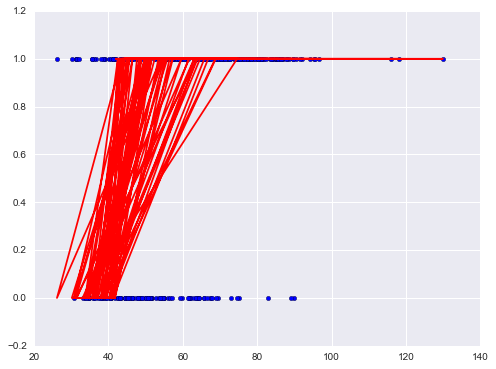

In [9]:
# plot the class predictions
plt.figure(figsize=(8, 6))
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred_class, color='red');
# We're overplotting in red here pelvic_incidence vs. outcome_pred_class

What went wrong? This is a line plot, and it connects points in the order they are found. Let's sort the DataFrame by "al" to fix this:

In [10]:
# add predicted class to DataFrame
vertebral_data['outcome_pred_class'] = outcome_pred_class

# sort DataFrame by pelvic_incidence so that the line plot makes sense
vertebral_data.sort('pelvic_incidence', inplace=True)
print(outcome_pred_class)
vertebral_data.head()

[1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0
 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 0]


/Users/markyashar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondy_grade,outcome,outcome_number,outcome_pred_class
26,26.15,10.76,14.00,15.39,125.20,-10.09,AB,1,0
53,30.15,11.92,34.00,18.23,112.68,11.46,AB,1,0
215,30.74,13.35,35.90,17.39,142.41,-2.01,NO,0,0
11,31.23,17.72,15.50,13.52,120.06,0.50,AB,1,0
17,31.28,3.14,32.56,28.13,129.01,3.62,AB,1,0


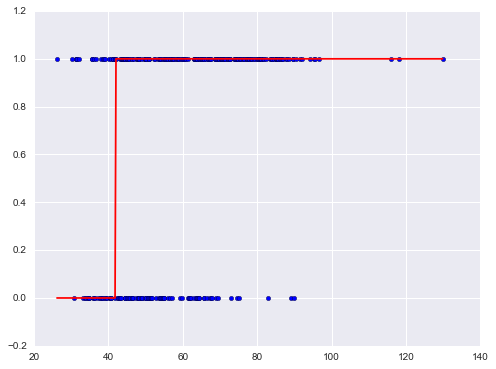

In [11]:
# plot the class predictions again
plt.figure(figsize=(8, 6))
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, vertebral_data.outcome_pred_class, color='red');
# We've plotted the zeros and ones of our predictions (outcome_pred_class) and it looks like this

### Logistic regression?

[**Linear regression:**](https://en.wikipedia.org/wiki/Linear_regression) continuous response is modeled as a linear combination of the features used :

$$y = \beta_0 + \beta_1x + ... \beta_nx$$

[**Logistic regression:**](https://en.wikipedia.org/wiki/Logistic_regression) model based on the [**logistic function**](https://en.wikipedia.org/wiki/Logistic_function) which takes any number and outputs a number between 0 and 1. We can interpret the output as a probability.

**Logistic function:
**
$$y = \frac{1}{1 + e^{-x}}$$

Here's what that looks like:

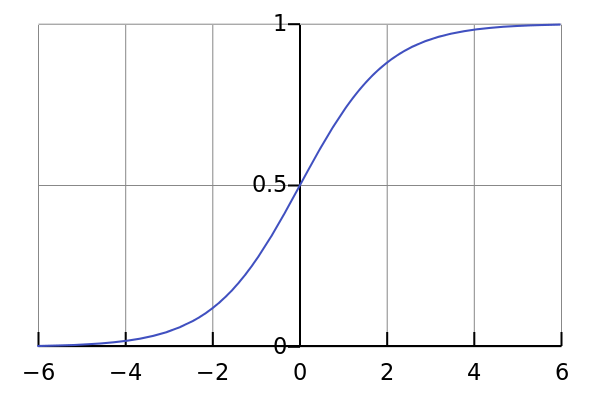

In [12]:
from IPython.display import Image
Image(filename='../images/logistic_curve.png')

![logistic curve](../images/logistic_curve.png)

The input variable is just the linear combination of features: $$\beta_0 + \beta_1x + ... \beta_nx$$

The sklearn logistic regression function will choose the best coefficients to fit the data. We can then use the logistic function to calculate probabilties.

$$P(y) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + ... + \beta_nx_n)}}$$

We can rearrange this equation:

$$\log \left( \frac{P(y)}{1-P(y)} \right) = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$$

The thing on the left is called the log-odds (because it's the log of the odds).

In other words:

- Logistic regression outputs the **probabilities of a specific class**
- Those probabilities can be converted into **class predictions**:

$f(x)= 
\begin{cases}
    1,& \text{if } p\geq 0.5\\
    0,              & \text{otherwise}
\end{cases}$

The **logistic function** has some nice properties:

- Takes on an "s" shape (which allows it to be differentiable, a really important math property for functions to have)
- Output is bounded by 0 and 1

Some things to note:

- **Multinomial logistic regression** is used when there are more than 2 classes.
- Coefficients are estimated using **maximum likelihood estimation**, meaning that we choose parameters that maximize the likelihood of the observed data. We do this using fancy math involving taking derivatives, and thats why that S-shaped curve is so important.

### Use Logistic Regression Instead of Linear Regression on Categorical Outcome Variables

Logistic regression can do exactly what we just did:

In [13]:
# Might want to review some of Andrew Ng's lecture notes on Logistic Regression from ML course here
# Goal: Again, we're trying to predict outcome_number here!
logreg = LogisticRegression(C=1e9)   # define the logistic regression
feature_cols = ['pelvic_incidence']
X = vertebral_data[feature_cols]
y = vertebral_data.outcome_number
logreg.fit(X, y)   # we fit it
outcome_pred_class_log = logreg.predict(X)   # we make (class) predictions based on the data that we get

In [14]:
# print the class predictions
outcome_pred_class_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

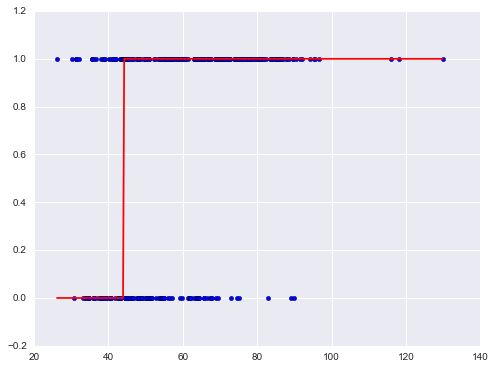

In [15]:
# plot the class predictions
plt.figure(figsize=(8, 6))
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred_class_log, color='red');
# This looks very similar to the previous plot

What if we wanted the **predicted probabilities** instead of just the **class predictions**, to understand how confident we are in a given prediction?

In [16]:
# store the predicted probabilites of class 1
outcome_probs = logreg.predict_proba(X)[:, 1]
print(outcome_probs)
print(logreg.predict_proba(X))

# predict_proba(X): Probability estimates.
# The returned estimates for all classes are ordered by the label of classes. For a multi_class problem, 
# if multi_class
# is set to be “multinomial” the softmax function is used to find the predicted probability of each class. Else use a 
# one-vs-rest approach, i.e calculate the probability of each class assuming it to be positive using the logistic 
# function. and normalize these values across all the classes



[ 0.2776073   0.32272128  0.32969355  0.33554176  0.3361414   0.33854523
  0.34592815  0.3575744   0.36688993  0.3675146   0.3742891   0.3776951
  0.37908622  0.3883677   0.39105311  0.39336016  0.39657228  0.39695835
  0.40030954  0.40379952  0.40963768  0.41733068  0.41955497  0.4215203
  0.4225695   0.42756258  0.42953766  0.43006473  0.43481536  0.4352118
  0.43878343  0.44275934  0.45059959  0.45193099  0.45273016  0.45472915
  0.4563294   0.45726329  0.46287274  0.46314011  0.46527976  0.46929499
  0.47036641  0.47090223  0.47425254  0.48095981  0.48095981  0.4863307
  0.4890174   0.4899579   0.49009227  0.49210788  0.49331738  0.49519897
  0.4970807   0.4980216   0.49976901  0.50380145  0.50420468  0.50514551
  0.50568312  0.5066239   0.50743024  0.50796778  0.50823655  0.51307333
  0.5134763   0.51535657  0.51763917  0.51924998  0.52018944  0.52153127
  0.52206792  0.52367755  0.53091431  0.53265467  0.53292235  0.53345765
  0.53359146  0.53626668  0.53920701  0.54534591  0.549

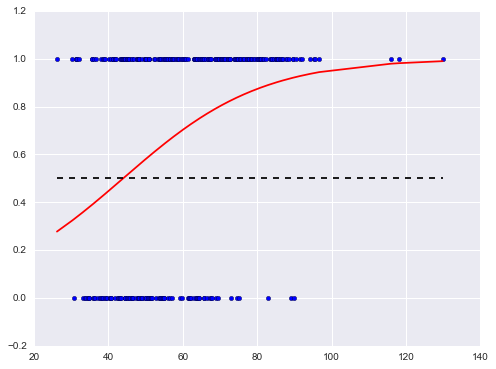

In [17]:
# plot the predicted probabilities, and the 50% line  -- we plot the actual probabilities here in this case
plt.figure(figsize=(8, 6))
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red')
plt.plot(vertebral_data.pelvic_incidence,np.ones(outcome_probs.shape)*.5,'k--');

In [18]:
# examine some example predictions
print("Pelvic incidence of 15:", logreg.predict_proba(15))
print("Pelvic incidence of 10:", logreg.predict_proba(10))
print("Pelvic incidence of 55:", logreg.predict_proba(55))
# Given some inputs we can get probabilities:  The first number in each entry indicates the predicted probability of 
# class 0, and the second number in each entry indicates the predicted probability of class 1.



Pelvic incidence of 15: [[ 0.82575878  0.17424122]]
Pelvic incidence of 10: [[ 0.8611287  0.1388713]]
Pelvic incidence of 55: [[ 0.35553129  0.64446871]]


What are these numbers? 

The first number in each entry indicates the predicted probability of **class 0**, and the second number in each entry indicates the predicted probability of **class 1**.

### Interpreting Logistic Regression Coefficients

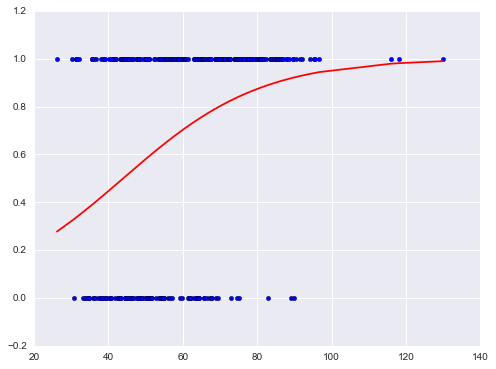

In [19]:
# plot the predicted probabilities again
plt.figure(figsize=(8, 6))
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_probs, color='red');
# Recall that:  outcome_probs = logreg.predict_proba(X)[:, 1]; this is the red curve below.

In [20]:
# compute predicted probability for pelvic_incidence=55 using the predict_proba method
logreg.predict_proba(55)[:, 1]

# According to instructor, 'the term "al", "al=2, al=3", is essentially gibberish. I accidentally left a few extra 
# statements in there from an older version of the notebook. It should say something like this:
 
# compute predicted probability for pelvic_incidence=55 using the predict_proba method
# logreg.predict_proba(55)[:, 1]


array([ 0.64446871])

In [21]:
# examine the coefficient for [al  ?]  -- examine beta_1   (?)
zip(feature_cols, logreg.coef_[0])   # is coef_[0] the same as beta_1?

[('pelvic_incidence', 0.053766875792266015)]

**Interpretation:** A 1 unit increase in `pelvic_incidence` is associated with a ~0.054 unit increase in the log-odds of `outcome`, where a positive outcome is having a vertebral abnormality (not positive in the real world, but positive in how we coded our outcome feature).

In [22]:
# compute predicted probability for al=3 using the predict_proba method
logreg.predict_proba(56)[:, 1]

array([ 0.65669037])

### What does this mean actually? 

**Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).**

In [23]:
# examine the intercept
logreg.intercept_   # this is the beta_0 value

array([-2.36236515])

**Interpretation:** For a 'pelvic_incidence' value of 0, the log-odds of 'outcome' is -2.36.

In [24]:
# convert log-odds to probability
logodds = logreg.intercept_     # the y-intercept is beta_0
odds = np.exp(logodds)          # Remember: odds = P(y)/(1-P(y)).   log(odds) = beta_0 = intercept_  when x_1...x_n = 0
prob = odds/(1 + odds)          # We take P(y) and use it to predict 1 or 0
print(prob)
print(logodds)
print(odds)

[ 0.08608793]
[-2.36236515]
[ 0.09419717]


That makes sense from the plot above, because the probability of outcome=1 should be very low for such a low `pelvic_incidence` value.

![logistic betas example](../images/logistic_betas_example.png)


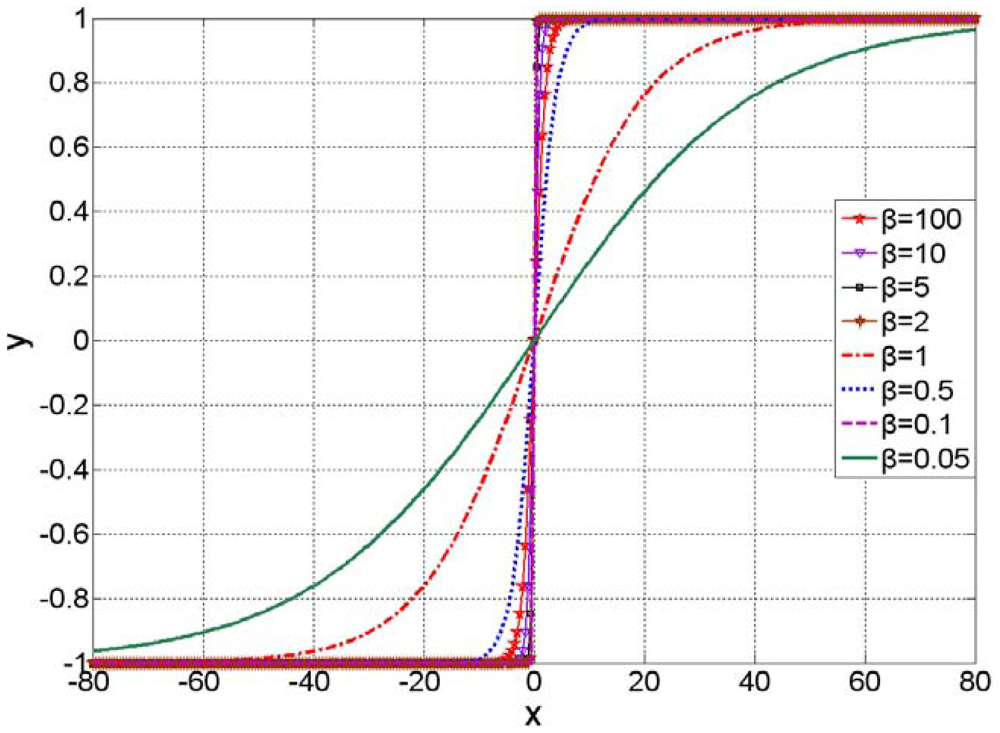

In [25]:
Image(filename='../images/logistic_betas_example.png')

Changing the $\beta_0$ value shifts the curve **horizontally**, whereas changing the $\beta_1$ value changes the **slope** of the curve.

The non-bias $\beta$ coefficients are effectively estimates of how certain you are of the outcome given how much evidence that specific feature gives you. A really high magnitude (positive or negative) value means you are very certain of the outcome, given you know that feature's value.

### How do we measure model performance for classification problems?

Now that we have a trained model just as we did before with linear regression, what is our **evaluation metric/loss function**?

There are two common (inverse) measurements we can make that capture the performance of our classification model:
  * **Classification accuracy**: percentage of correct predictions (**reward function**)
  * **Classification error**: percentage of incorrect predictions (**loss function**)

In our case, we are going to use classification accuracy. Let's compute our classification accuracy after training on the whole dataset, using our just-trained one-feature model and the scikit-learn method `accuracy_score`:

In [26]:
y = vertebral_data.outcome_number
y_pred = outcome_pred_class
print("Model accuracy:",metrics.accuracy_score(y,y_pred))
# This is only for using 1 feature

Model accuracy: 0.625806451613


68% is ok, but its not really fantastic. Can we do better? (YES WE CAN!)

In [27]:
# Some additional notes on the Confusion Matrix (see https://en.wikipedia.org/wiki/Confusion_matrix)
metrics.confusion_matrix(y,y_pred)

# sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)[source]:
# Compute confusion matrix to evaluate the accuracy of a classification
# By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group 
# i but predicted to be in group j. Thus, in binary classification, the count of true negatives is C_{0,0}, false 
# negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

# Parameters:	 
# y_true : array, shape = [n_samples]; Ground truth (correct) target values.
# y_pred : array, shape = [n_samples]; Estimated targets as returned by a classifier.

# In the confusion matrix (predicted) here, we have 14 true positives, 30 false positives, 86 true negatives, and
# 180 false negatives



array([[ 14,  86],
       [ 30, 180]])

#### Exercise Time!!
  * Generate the logistic regression model incorporating all of the features we have available to predict `outcome_number` and get the accuracy when training and testing on all data. How much better is this than the case where we trained our model using only `pelvic_incidence`?
  * Use train/test split with 70% training, 30% testing and get the test error of the model trained on all features using `train_test_split` like we did during linear regression 
  * Inspect all of the model coefficients of the model trained on all features. Which feature is the most important for the prediction? Which is the least important?
  * What are some problems you can see in using the data like we have been? (Look at the fraction of positive and negative outcomes in the dataset)

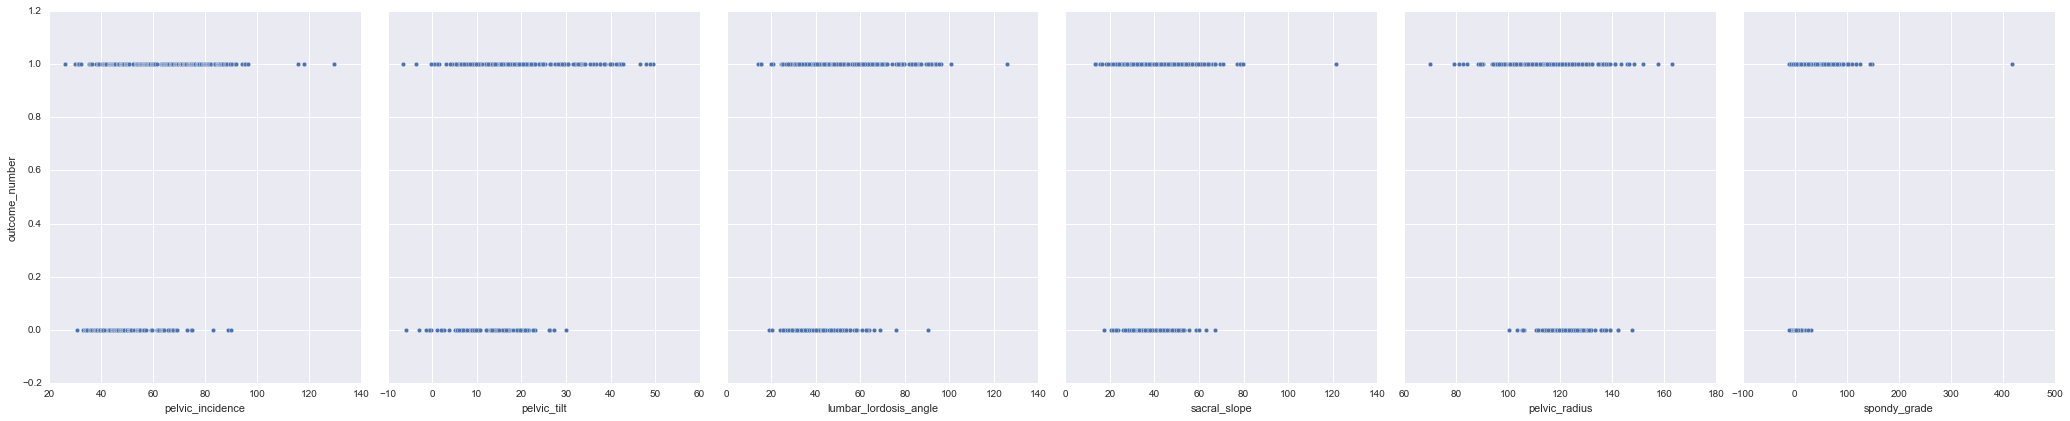

In [28]:
# pass
# vertebral_data.head()
sns.pairplot(vertebral_data,x_vars=["pelvic_incidence","pelvic_tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","spondy_grade"],y_vars="outcome_number", size=6, aspect=0.8);

In [29]:
# Fit a linear regression model and store the predictions -- Generate the logistic regression model incorporating 
# all of the features we have available to predict outcome_number and get the accuracy when training and testing on 
# all data. How much better is this than the case where we trained our model using only pelvic_incidence?
feature_cols_all = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','spondy_grade']
X_all = vertebral_data[feature_cols_all]
y_all = vertebral_data.outcome_number
linreg_all = LinearRegression()
linreg_all.fit(X_all, y_all)
outcome_pred_all = linreg_all.predict(X_all)
outcome_pred_all

array([ 0.43852238,  0.77219626,  0.33285913,  0.63786913,  0.36620068,
        0.63300857,  0.41272016,  0.43104491,  0.32336217,  0.44698117,
        0.31229228,  0.4748067 ,  0.32236786,  0.65504653,  0.39573706,
        0.35335641,  0.73759104,  0.16986366,  0.46370116,  0.96450898,
        0.55968651,  0.43013356,  0.10423768,  0.42919227,  0.40995326,
        0.54798039,  0.54698681,  0.50639617,  0.58243227,  0.27385262,
        0.52127683,  0.42305211,  0.40580122,  0.40420024,  0.31330043,
        0.59109127,  0.2170641 ,  0.19820432,  0.59268111,  0.82304034,
        0.65471946,  0.49779983,  0.5488977 ,  0.58555554,  0.65604703,
        0.62449728,  0.40489817,  0.29589549,  0.45140311,  0.44331627,
        0.53912823,  0.55024866,  0.24392734,  0.80267716,  1.17145143,
        0.56276798,  0.39308497,  0.77926724,  0.77781919,  0.49055171,
        0.42532422,  0.35051486,  0.70425007,  0.49193158,  0.74044118,
        0.5942099 ,  0.58920186,  0.12311048,  0.4937896 ,  0.43

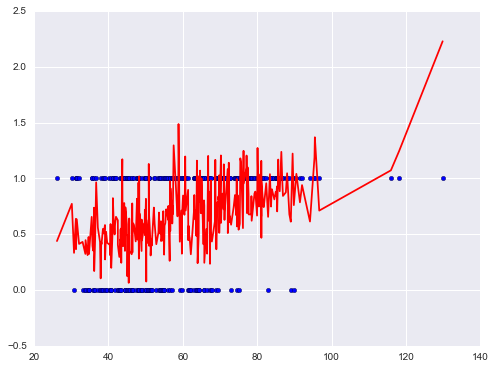

In [30]:
# scatter plot that includes the regression line
plt.figure(figsize=(8, 6))
plt.scatter(vertebral_data.pelvic_incidence, vertebral_data.outcome_number)
plt.plot(vertebral_data.pelvic_incidence, outcome_pred_all, color='red');

In [31]:
outcome_pred_all[:10]

array([ 0.43852238,  0.77219626,  0.33285913,  0.63786913,  0.36620068,
        0.63300857,  0.41272016,  0.43104491,  0.32336217,  0.44698117])

In [32]:
# transform predictions to 1 or 0
outcome_pred_class_all = np.where(outcome_pred_all >= 0.5, 1, 0)
outcome_pred_class_all    # we're predicting whether outcome_number (?) belongs to 0 or 1

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [33]:
logreg_all = LogisticRegression(C=1e9)   # define the logistic regression
feature_cols = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','spondy_grade']
X_all = vertebral_data[feature_cols_all]
y_all = vertebral_data.outcome_number
logreg_all.fit(X_all, y_all)   # we fit it
outcome_pred_class_log_all = logreg_all.predict(X_all)   # we make predictions based on the data that we get

In [34]:
outcome_pred_class_log_all

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1,

In [35]:
# store the predicted probabilites of class 1
outcome_probs_all = logreg_all.predict_proba(X_all)[:, 1]
outcome_probs_all

array([ 0.28454648,  0.96145821,  0.16870641,  0.87891602,  0.24666649,
        0.79366252,  0.38781209,  0.53965402,  0.12737247,  0.22197394,
        0.06652146,  0.15672278,  0.12601731,  0.76379354,  0.50882269,
        0.06076585,  0.87368949,  0.02192383,  0.5466556 ,  0.90060355,
        0.85336022,  0.55101699,  0.71730876,  0.4534919 ,  0.2080149 ,
        0.79581014,  0.49270882,  0.54423362,  0.73574081,  0.09668099,
        0.37692505,  0.19519218,  0.42729045,  0.22167664,  0.03456815,
        0.60438875,  0.05540927,  0.01919488,  0.35176359,  0.98984001,
        0.60415545,  0.17349754,  0.47627075,  0.80591945,  0.75555232,
        0.80788825,  0.37154431,  0.01003899,  0.28891303,  0.32586915,
        0.46953863,  0.62367034,  0.04932992,  0.92228825,  0.99977458,
        0.78423054,  0.3746849 ,  0.9960458 ,  0.97022723,  0.50079924,
        0.20434467,  0.13720715,  0.83904372,  0.88565244,  0.92371148,
        0.98326501,  0.82179452,  0.00796018,  0.23734418,  0.09

In [36]:
# examine some example predictions
print("When all features are used:", logreg_all.predict_proba([56,15,40,30,110,6]))
print("When all features are used:", logreg_all.predict_proba([45,20,35,32,108,7]))
print("When all features are used:", logreg_all.predict_proba([55,17,44,28,113,9]))
# given some inputs we can get probabilities. The first number in each entry indicates the predicted probability of 
# class 0, and the second number in each entry indicates the predicted probability of class 1.


When all features are used: [[ 0.22017625  0.77982375]]
When all features are used: [[ 0.06754239  0.93245761]]
When all features are used: [[ 0.1455123  0.8544877]]


/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a

In [37]:
# compute predicted probability for various values for the various features using the predict_proba method
logreg_all.predict_proba([51,16,41,31,113,9])[:, 1]

/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.84776632])

In [38]:
# examine the coefficient for al
zip(feature_cols_all, logreg_all.coef_[0])

[('pelvic_incidence', -0.037855810809211597),
 ('pelvic_tilt', 0.11846133651362369),
 ('lumbar_lordosis_angle', -0.019969170154629397),
 ('sacral_slope', -0.048640836751458243),
 ('pelvic_radius', -0.092668146367410276),
 ('spondy_grade', 0.16380762363624676)]

In [39]:
# compute predicted probability for al=3 using the predict_proba method
logreg_all.predict_proba([52,17,42,32,114,10])[:, 1]

/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.85818829])

In [40]:
logreg_all.intercept_

array([ 13.07628717])

In [41]:
logodds_all = logreg_all.intercept_     # the y-intercept is beta_0
odds_all = np.exp(logodds_all)          # Remember: odds = P(y)/(1-P(y)).   log(odds) = beta_0 = intercept_  when x_1...x_n = 0
prob_all = odds_all/(1 + odds_all)          # We take P(y) and use it to predict 1 or 0
print(prob_all)
print(logodds_all)
print(odds_all)

[ 0.99999791]
[ 13.07628717]
[ 477484.59070173]


In [42]:
y_all = vertebral_data.outcome_number
y_pred_all = outcome_pred_class_all
print("Model accuracy:",metrics.accuracy_score(y_all,y_pred_all))
# Recall that we've used all the features here, and we see that the model accuracy is significantly greater for
# this case than when only the pelvic_incidence feature is used:  
print("Model accuracy is", 0.8516/0.6258, "times greater than when only the pelvic_incidence feature is used.")

Model accuracy: 0.851612903226
Model accuracy is 1.36081815276 times greater than when only the pelvic_incidence feature is used.


In [43]:
metrics.confusion_matrix(y_all,y_pred_all)

array([[ 68,  32],
       [ 14, 196]])

In [44]:
# Use train/test split with 70% training, 30% testing and get the test error of the model trained on all features 
# using train_test_split like we did during linear regression
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.3, random_state=1)
# Split arrays or matrices into random train and test subsets
# -- use random state for debugging purposes
print("training data size:",X_all_train.shape)
print("testing data size:",X_all_test.shape)
print ("total data size:", X_all.shape)
print("size of y_mult:", y_all.shape)
print("size of y_mult_train: ", y_all_train.shape)
print("size of y_mult_test: ", y_all_test.shape)
# test_size : float, int, or None (default is None): If float, should be between 0.0 and 1.0 and represent the 
# proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If 
# None, the value is automatically set to the complement of the train size. If train size is also None, test size is 
# set to 0.25.

training data size: (217, 6)
testing data size: (93, 6)
total data size: (310, 6)
size of y_mult: (310,)
size of y_mult_train:  (217,)
size of y_mult_test:  (93,)


In [45]:
logreg_all2 = LogisticRegression(C=1e9)   # define the logistic regression
logreg_all2.fit(X_all_train, y_all_train)   # we fit it
outcome_pred_class_log_all_train = logreg_all2.predict(X_all_train)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_all_train,outcome_pred_class_log_all_train)))
print("Training set MAE: ",metrics.mean_absolute_error(y_all_train, outcome_pred_class_log_all_train))
print("Training set MSE: ",metrics.mean_squared_error(y_all_train,outcome_pred_class_log_all_train))
# # generate predictions on testing set and evaluate
outcome_pred_class_log_all_test = logreg_all2.predict(X_all_test)
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_all_test,outcome_pred_class_log_all_test)))
print("Training set MAE: ",metrics.mean_absolute_error(y_all_test, outcome_pred_class_log_all_test))
print("Training set MSE: ",metrics.mean_squared_error(y_all_test,outcome_pred_class_log_all_test))


Training set RMSE: 0.36556880747
Training set MAE:  0.133640552995
Training set MSE:  0.133640552995
Test set RMSE: 0.414780677892
Training set MAE:  0.172043010753
Training set MSE:  0.172043010753


In [46]:
print(outcome_pred_class_log_all_train)
print(outcome_pred_class_log_all_test)

[0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0
 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0]
[0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0]


In [47]:
# Inspect all of the model coefficients of the model trained on all features. Which feature is the most important for 
# the prediction? Which is the least important?
outcome_probs_all_train = logreg_all2.predict_proba(X_all_train)[:, 1]
print(outcome_probs_all_train)
outcome_probs_all_test = logreg_all2.predict_proba(X_all_test)[:, 1]
print(outcome_probs_all_test)

[ 0.00437004  0.97296666  0.60018797  0.02535642  0.17171997  0.99308153
  0.99975758  0.37937292  1.          0.9999596   0.98465663  0.89493729
  0.38230926  0.16336532  0.99844937  0.87203109  0.66346544  0.999994
  0.53367444  0.20342196  0.03860648  0.99634586  0.99966253  0.13583352
  0.73617797  0.99974686  0.76992057  0.84725636  0.80240452  0.21450787
  0.91835985  0.9985473   0.08288687  0.99988338  0.92374164  0.68129993
  0.13105169  0.70779208  0.33167763  0.99999789  0.21048697  0.99866345
  0.09001132  0.15431293  0.52087625  0.96786055  0.81419044  0.99999997
  0.19575216  0.78551192  0.98631759  0.9977989   0.98825619  0.32418375
  0.99988581  0.00643718  0.99999036  0.9993578   0.54843169  0.40231104
  0.99135557  0.07942437  0.90182233  0.99179041  0.12709885  0.37163302
  0.01921491  0.97205192  0.99607781  0.98198229  0.98864645  0.99999938
  0.07179001  0.9869787   0.27279877  0.09716309  0.99608623  0.79370625
  0.08109875  0.99876538  0.60734462  0.22024911  0.9

In [48]:
print("When all features are used:", logreg_all2.predict_proba([56,15,40,30,110,6]))
print("When all features are used:", logreg_all2.predict_proba([45,20,35,32,108,7]))
print("When all features are used:", logreg_all2.predict_proba([55,17,44,28,113,9]))

When all features are used: [[ 0.37600294  0.62399706]]
When all features are used: [[ 0.05160467  0.94839533]]
When all features are used: [[ 0.26722365  0.73277635]]


/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a

In [49]:
logreg_all2.predict_proba([51,16,41,31,113,9])[:, 1]

/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.78531489])

In [50]:
list(zip(feature_cols_all, logreg_all2.coef_[0]))

[('pelvic_incidence', -0.087913946410530894),
 ('pelvic_tilt', 0.18300471341820509),
 ('lumbar_lordosis_angle', -0.024792491681943942),
 ('sacral_slope', 0.015043094217574857),
 ('pelvic_radius', -0.10310176848035467),
 ('spondy_grade', 0.16228132337245774)]

In [51]:
# Which feature is the most important for the prediction? Which is the least important?
# If I did this correctly and understand what's going on here, the most important feature for the prediction is
# pelvic_incidence and the least important feature is sacral_slope.

In [52]:
logreg_all2.predict_proba([52,17,42,32,114,10])[:, 1]

/Users/markyashar/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.80867652])

In [53]:
logreg_all2.intercept_

array([ 13.59257245])

In [54]:
logodds_all2 = logreg_all2.intercept_     # the y-intercept is beta_0
odds_all2 = np.exp(logodds_all2)          # Remember: odds = P(y)/(1-P(y)).   log(odds) = beta_0 = intercept_  when x_1...x_n = 0
prob_all2 = odds_all2/(1 + odds_all2)          # We take P(y) and use it to predict 1 or 0
print(prob_all2)
print(logodds_all2)
print(odds_all2)

[ 0.99999875]
[ 13.59257245]
[ 800164.36780492]


In [55]:
print("Model accuracy for training data:",metrics.accuracy_score(y_all_train,outcome_pred_class_log_all_train))
print("Model accuracy for testing data:",metrics.accuracy_score(y_all_test,outcome_pred_class_log_all_test))
# Recall that we've used all the features here, and we see that the model accuracy is significantly greater for
# this case than when only the pelvic_incidence feature is used.

Model accuracy for training data: 0.866359447005
Model accuracy for testing data: 0.827956989247


In [56]:
# What are some problems you can see in using the data like we have been? (Look at the fraction of positive and 
# negative outcomes in the dataset). It appears that the fraction of positives (1) are significantly greater than
# the fraction of negatives (0) in outcome_pred_class_log_all_train and outcome_pred_class_log_all_test.

### Comparing Logistic Regression with Other Models

Logistic regression has some really awesome advantages:

  * It is a highly interpretable method (if you remember what the conversions from log-odds to probability are)
  * Model training and prediction are fast
  * No tuning is required (excluding regularization, which we will talk about later)
  * No need to scale features
  * Outputs well-calibrated predicted probabilities (the probabilities behave like probabilities)

However, logistic regression also has some disadvantages:

  * It presumes a linear relationship between the features and the log-odds of the response
  * Compared to other, more fancypants modeling approaches, performance is (generally) not competitive with the best supervised learning methods
  * Like linear regression for regression, it is sensitive to irrelevant features
  * Unless you explicitly code them (we will see how to do that later), logistic regression can't automatically learn feature interactions